<a href="https://colab.research.google.com/github/gomescheelsy03/INST-414-0101-/blob/main/Gowalla_Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip -q install networkx

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [3]:
import pandas as pd

edges = pd.read_csv(
    "Gowalla_edges.txt",
    sep=r"\s+",          # treat any whitespace (tabs/spaces) as delimiter
    header=None,
    names=["user1", "user2"],
    engine="python",     # robust for regex separators
)
edges.head(), edges.shape


(   user1  user2
 0      0      1
 1      0      2
 2      0      3
 3      0      4
 4      0      5,
 (1900654, 2))

In [6]:
import networkx as nx

G = nx.from_pandas_edgelist(edges, source="user1", target="user2")

# Get graph information (replacement for nx.info)
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"Graph created successfully!")
print(f"Number of nodes (users): {num_nodes}")
print(f"Number of edges (friend connections): {num_edges}")


Graph created successfully!
Number of nodes (users): 196591
Number of edges (friend connections): 950327


In [7]:
# Degree centrality = how many direct connections a user has
degree_c = nx.degree_centrality(G)

# Top 3 users by degree
top3_degree = sorted(degree_c.items(), key=lambda x: x[1], reverse=True)[:3]
top3_degree


[(307, 0.07492751411567221),
 (220, 0.051808332061651155),
 (505, 0.02757006968818353)]

In [10]:
import random

# Take a random sample of nodes
sample_nodes = random.sample(list(G.nodes()), 2000)

# Compute betweenness on that smaller subgraph
H = G.subgraph(sample_nodes).copy()

bet_c = nx.betweenness_centrality(H)
top3_bet = sorted(bet_c.items(), key=lambda x: x[1], reverse=True)[:3]
top3_bet


[(918, 4.30645753307084e-05),
 (3571, 1.2018021022523273e-05),
 (5568, 1.0515768394707864e-05)]

In [13]:
# PageRank centrality: influence within the network
pr = nx.pagerank(G, alpha=0.85, max_iter=100, tol=1e-06)

# Get top 3 users by PageRank
top3_pr = sorted(pr.items(), key=lambda x: x[1], reverse=True)[:3]
top3_pr


[(220, 0.009146396732407218),
 (307, 0.007735950666343333),
 (505, 0.003252284644988355)]

In [14]:
import pandas as pd

# Convert dictionaries to DataFrames
df_degree = pd.DataFrame(list(degree_c.items()), columns=["user","degree_c"])
df_bet    = pd.DataFrame(list(bet_c.items()),     columns=["user","betweenness_c"])
df_pr     = pd.DataFrame(list(pr.items()),        columns=["user","pagerank"])

# Merge and calculate combined rank
summary = df_degree.merge(df_bet, on="user", how="outer").merge(df_pr, on="user", how="outer")

summary["rank_sum"] = (
    summary["degree_c"].rank(ascending=False, method="min") +
    summary["betweenness_c"].rank(ascending=False, method="min") +
    summary["pagerank"].rank(ascending=False, method="min")
)

# Display top 10 most important users overall
top_table = summary.sort_values("rank_sum").head(10).reset_index(drop=True)
top_table


,user,degree_c,betweenness_c,pagerank,rank_sum
0,918,0.005422,0.000043,0.000362,57.0
1,5568,0.003286,0.000011,0.000215,132.0
2,3571,0.001134,0.000012,0.000055,997.0
3,275,0.000880,0.000001,0.000051,1334.0
4,10137,0.000870,0.000000,0.000051,1379.0
5,8865,0.000972,0.000000,0.000044,1453.0
6,4438,0.000855,0.000000,0.000042,1730.0
7,7261,0.000732,0.000004,0.000041,1990.0
8,14673,0.000651,0.000007,0.000043,2102.0
9,4362,0.000753,0.000000,0.000038,2110.0


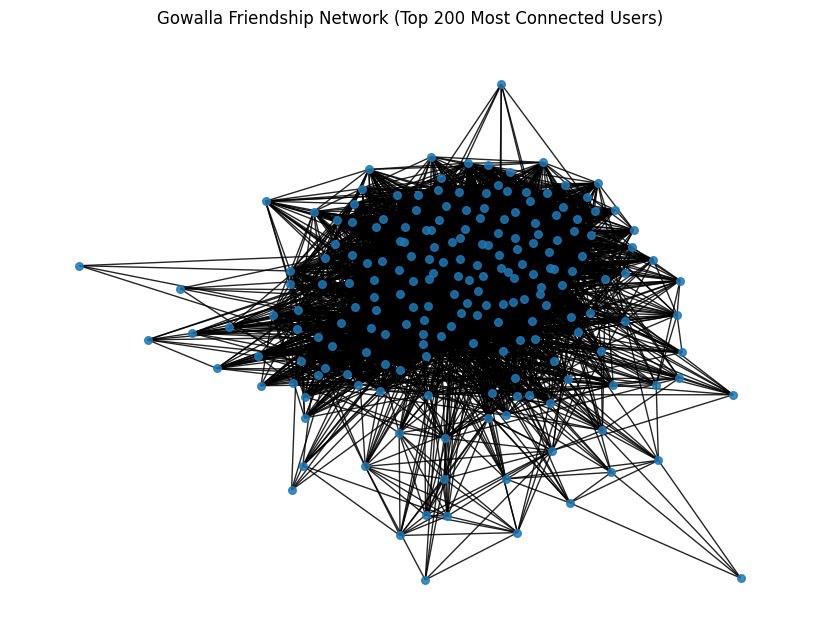

In [15]:
import matplotlib.pyplot as plt

# Pick top 200 most connected users for a clean visualization
top200_nodes = [n for n, _ in sorted(degree_c.items(), key=lambda x: x[1], reverse=True)[:200]]
H = G.subgraph(top200_nodes).copy()

plt.figure(figsize=(8,6))
pos = nx.spring_layout(H, seed=7)
nx.draw(H, pos, node_size=30, alpha=0.85, with_labels=False)
plt.title("Gowalla Friendship Network (Top 200 Most Connected Users)")
plt.show()


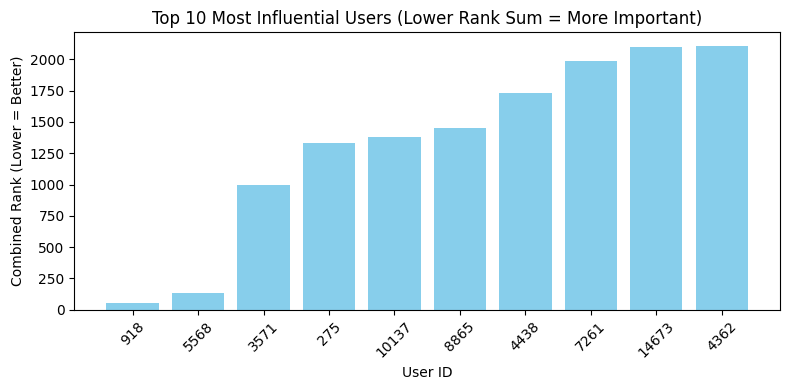

In [16]:
import matplotlib.pyplot as plt

# Bar chart of top 10 users
plt.figure(figsize=(8,4))
plt.bar(top_table["user"].astype(str), top_table["rank_sum"], color='skyblue')
plt.title("Top 10 Most Influential Users (Lower Rank Sum = More Important)")
plt.xlabel("User ID")
plt.ylabel("Combined Rank (Lower = Better)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


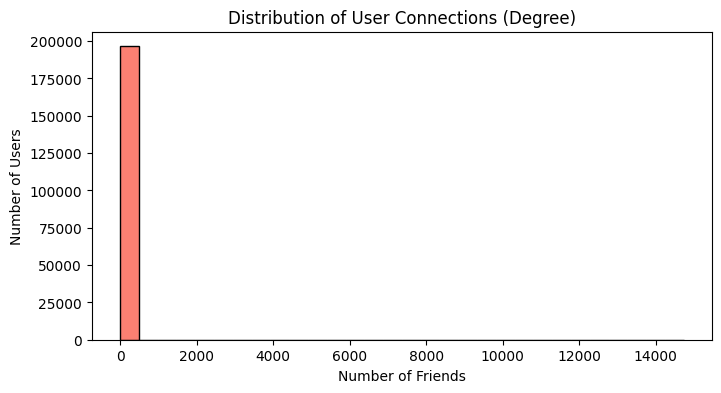

In [17]:
degrees = [d for n, d in G.degree()]
plt.figure(figsize=(8,4))
plt.hist(degrees, bins=30, color='salmon', edgecolor='black')
plt.title("Distribution of User Connections (Degree)")
plt.xlabel("Number of Friends")
plt.ylabel("Number of Users")
plt.show()


In [18]:
checkins = pd.read_csv("Gowalla_cleanCheckins.csv")
checkins.head()


,user,check-in time,latitude,longitude,location id
0,0,2010-10-19T23:55:27Z,30.235909,-97.795140,22847
1,0,2010-10-18T22:17:43Z,30.269103,-97.749395,420315
2,0,2010-10-17T23:42:03Z,30.255731,-97.763386,316637
3,0,2010-10-17T19:26:05Z,30.263418,-97.757597,16516
4,0,2010-10-16T18:50:42Z,30.274292,-97.740523,5535878


In [19]:
checkins_per_user = checkins["user"].value_counts().head(10)
checkins_per_user


,count
user,
10971,2175
776,2175
18931,2150
49918,2125
620,2125
19096,2100
2,2100
695,2075
19278,2075


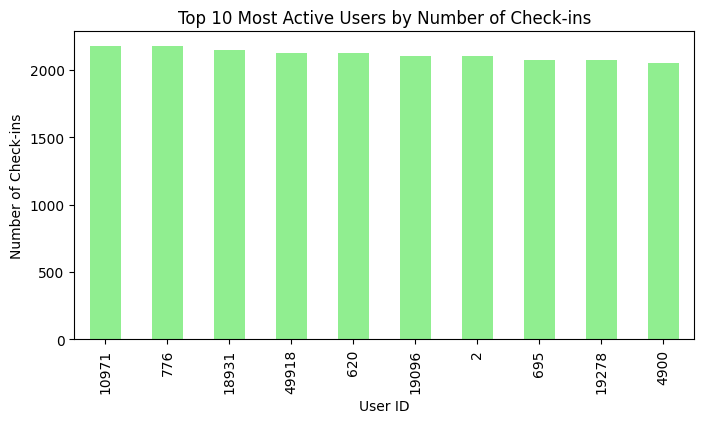

In [20]:
plt.figure(figsize=(8,4))
checkins_per_user.plot(kind='bar', color='lightgreen')
plt.title("Top 10 Most Active Users by Number of Check-ins")
plt.xlabel("User ID")
plt.ylabel("Number of Check-ins")
plt.show()


/tmp/ipython-input-1549711987.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  checkins["month"] = checkins["check-in time"].dt.to_period("M")


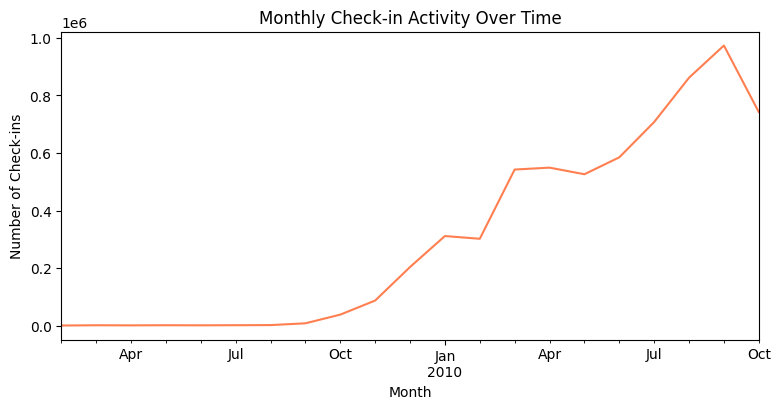

In [21]:
checkins["check-in time"] = pd.to_datetime(checkins["check-in time"])
checkins["month"] = checkins["check-in time"].dt.to_period("M")

monthly = checkins["month"].value_counts().sort_index()
monthly.plot(figsize=(9,4), color='coral')
plt.title("Monthly Check-in Activity Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Check-ins")
plt.show()
